Plotting available axon diameter distributions in NRV
=====================================================

This example shows how to plot available axon diameter distributions in NRV

NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated


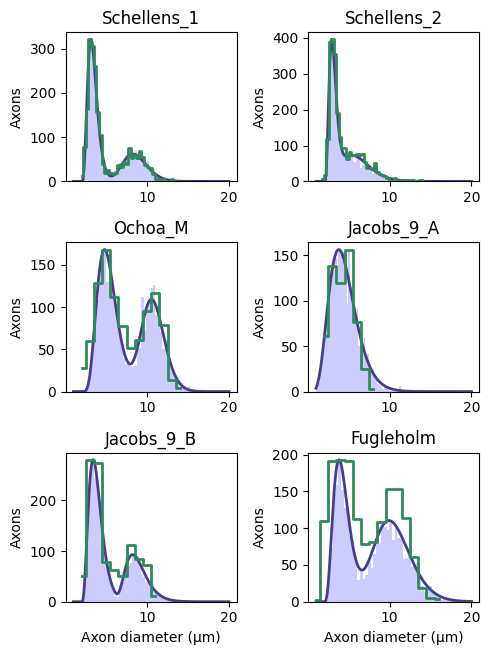

In [ ]:
import nrv
import matplotlib.pyplot as plt
import numpy as np

myelinated_stats = [
    "Schellens_1",
    "Schellens_2",
    "Ochoa_M",
    "Jacobs_9_A",
    "Jacobs_9_B",
    "Fugleholm",
]

unmyelinated_stats = [
    "Ochoa_U",
    "Jacobs_11_A",
    "Jacobs_11_B",
    "Jacobs_11_C",
    "Jacobs_11_D",
    "Jacobs_11_D",
]

if __name__ == '__main__':
    N = 10000
    fig_idxs= [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
    xspace1 = np.linspace(1,20,num=500)

    fig1, axs1 = plt.subplots(3, 2, figsize=(5, 5*1.33))
    for k in range(len(myelinated_stats)):

        m_stat = myelinated_stats[k]
        u_stat = unmyelinated_stats[0]
        axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(N,M_stat=m_stat,U_stat=u_stat)

        y_M, x, _ = axs1[fig_idxs[k]].hist(M_diam_list,bins = 50,color = 'blue',alpha = 0.2)
        

        gen, popt1, pcov1 = nrv.create_generator_from_stat(m_stat)
        diam, pres = nrv.load_stat(m_stat)
        
        if (len(popt1)>4):
            data = (nrv.two_Gamma(xspace1, *popt1))
        else:
            data = (nrv.one_Gamma(xspace1, *popt1))
        scale_factor= np.max(y_M)
        data = data*scale_factor/np.max(data)
        pres = pres*scale_factor/np.max(pres)
        axs1[fig_idxs[k]].plot(xspace1,data,linewidth = 2,color ="darkslateblue")
        axs1[fig_idxs[k]].step(diam,pres,linewidth = 2,color ="seagreen",where="mid")

        axs1[fig_idxs[k]].set_title(m_stat)
        axs1[fig_idxs[k]].set_ylabel("Axons")

    axs1[fig_idxs[-1]].set_xlabel("Axon diameter (µm)")
    axs1[fig_idxs[-2]].set_xlabel("Axon diameter (µm)")
    fig1.tight_layout()


NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated
NRV INFO: On 10000 axons to generate, there are 3000 Myelinated and 7000 Unmyelinated


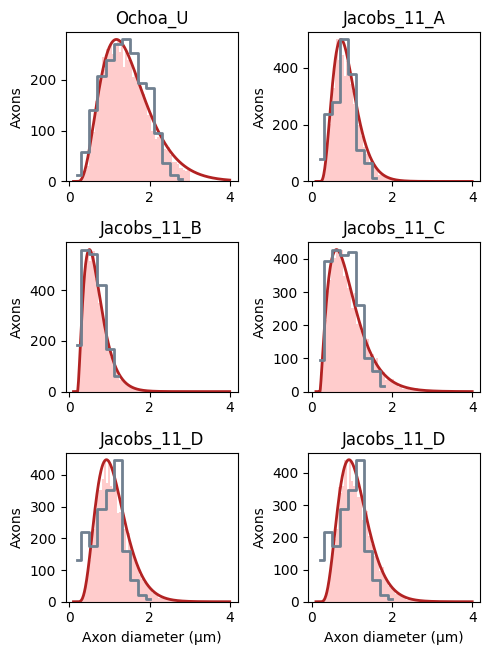

In [2]:
if __name__ == '__main__':
    fig1, axs1 = plt.subplots(3, 2, figsize=(5, 5*1.33))

    xspace1 = np.linspace(0.1,4,num=500)
    for k in range(len(unmyelinated_stats)):

        m_stat = myelinated_stats[0]
        u_stat = unmyelinated_stats[k]
        axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(N,M_stat=m_stat,U_stat=u_stat)

        y_U, x, _ = axs1[fig_idxs[k]].hist(U_diam_list,bins = 50,color = 'red',alpha = 0.2)

        gen, popt1, pcov1 = nrv.create_generator_from_stat(u_stat)#,dmin = 0.1,dmax=3)
        diam, pres = nrv.load_stat(u_stat)
        
        data = (nrv.one_Gamma(xspace1, *popt1))
        scale_factor= np.max(y_U)
        data = data*scale_factor/np.max(data)
        pres = pres*scale_factor/np.max(pres)
        axs1[fig_idxs[k]].plot(xspace1,data,linewidth = 2,color ="firebrick")
        axs1[fig_idxs[k]].step(diam,pres,linewidth = 2,color ="slategray",where="mid")
        axs1[fig_idxs[k]].set_title(u_stat)
        axs1[fig_idxs[k]].set_ylabel("Axons")

    axs1[fig_idxs[-1]].set_xlabel("Axon diameter (µm)")
    axs1[fig_idxs[-2]].set_xlabel("Axon diameter (µm)")
    fig1.tight_layout()